In [1]:
import time
from faker import Faker
import random
import csv

fake = Faker()

def generate_batch_data(batch_size):
    """Generate a batch of random data"""
    data = []
    for _ in range(batch_size):
        data.append({
            'id': fake.uuid4(),
            'timestamp': fake.date_time_this_decade(),
            'product_name': fake.word(),
            'price': round(random.uniform(10, 1000), 2),
            'quantity': random.randint(1, 100),
            'category': fake.word(),
            'customer_name': fake.name(),
            'email': fake.email(),
            'address': fake.address(),
            'country': fake.country(),
            'payment_method': fake.random_element(elements=('Credit Card', 'Cash', 'PayPal')),
            'phone_number': fake.phone_number(),
            'discount_applied': round(random.uniform(0, 100), 2),
            'shipping_method': fake.random_element(elements=('Standard Shipping', 'Express Shipping')),
            'order_status': fake.random_element(elements=('Pending', 'Shipped', 'Delivered')),
            'customer_age': random.randint(18, 80)
        })
    return data

def write_csv(file_name, data):
    """Write data to CSV file"""
    with open(file_name, 'w', newline='') as csvfile:
        fieldnames = data[0].keys()
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

def create_csv_file(file_name, num_records):
    """Generate data for one batch and write to CSV"""
    batch_size = num_records

    start_time = time.time()
    batch_data = generate_batch_data(batch_size)
    write_csv(file_name, batch_data)
    end_time = time.time()

    return end_time - start_time

if __name__ == "__main__":
    base_file_name = 'data_spark.csv'
    num_records = 1_000_000

    execution_time = create_csv_file(base_file_name, num_records)
    print(f"Data generation and CSV writing took {execution_time:.2f} seconds.")


Data generation and CSV writing took 375.48 seconds.


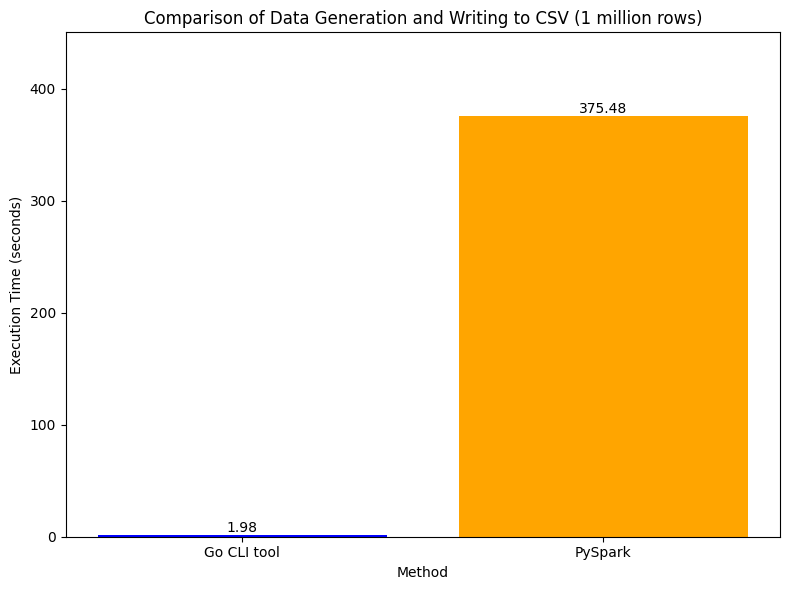

In [2]:
import matplotlib.pyplot as plt

# Execution times in seconds
execution_times = {
    'Go CLI tool': 1.98,
    'PySpark': 375.48
}

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(execution_times.keys(), execution_times.values(), color=['blue', 'orange'])
plt.xlabel('Method')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Data Generation and Writing to CSV (1 million rows)')
plt.ylim(0, max(execution_times.values()) * 1.2)

# Add labels to bars
for method, time in execution_times.items():
    plt.text(method, time, f'{time:.2f}', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

In [4]:
import csv
import os
import time
from faker import Faker
import random

fake = Faker()

def generate_batch_data(batch_size):
    """Generate a batch of random data"""
    data = []
    for _ in range(batch_size):
        data.append({
            'id': fake.uuid4(),
            'timestamp': fake.date_time_this_decade(),
            'product_name': fake.word(),
            'price': round(random.uniform(10, 1000), 2),
            'quantity': random.randint(1, 100),
            'category': fake.word(),
            'customer_name': fake.name(),
            'email': fake.email(),
            'address': fake.address(),
            'country': fake.country(), 
            'payment_method': fake.random_element(elements=('Credit Card', 'Cash', 'PayPal')),  
            'phone_number': fake.phone_number(),  
            'discount_applied': round(random.uniform(0, 100), 2), 
            'shipping_method': fake.random_element(elements=('Standard Shipping', 'Express Shipping')),  
            'order_status': fake.random_element(elements=('Pending', 'Shipped', 'Delivered')),   
            'customer_age': random.randint(18, 80)  
            })
    return data

def write_csv(file_name, fieldnames, data):
    """Write data to CSV file"""
    with open(file_name, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

def create_csv_file(file_name, fieldnames, num_records):
    """Generate data and write to CSV"""
    batch_size = num_records

    start_time = time.time()
    batch_data = generate_batch_data(batch_size)
    write_csv(file_name, fieldnames, batch_data)
    end_time = time.time()

    return end_time - start_time

if __name__ == "__main__":
    base_file_name = 'data_python.csv'
    field_names = ['id','timestamp','product_name', 'price', 'quantity', 'category', 'customer_name', 'email', 'address','country','payment_method','phone_number','discount_applied','shipping_method','order_status','customer_age']
    num_records = 1_000_000

    execution_time = create_csv_file(base_file_name, field_names, num_records)
    print(f"Data generation and CSV writing took {execution_time:.2f} seconds.")


Data generation and CSV writing took 385.11 seconds.


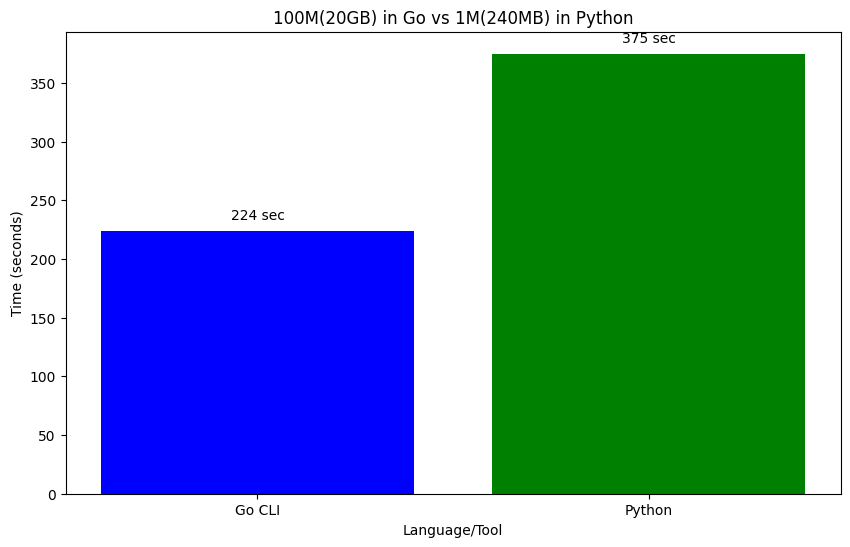

In [7]:
import matplotlib.pyplot as plt

# Data
languages = ['Go CLI', 'Python']
rows = [100000000, 1000000]  # Number of rows
times = [224, 375]  # Time taken in seconds

# Create the chart
plt.figure(figsize=(10, 6))
plt.bar(languages, times, color=['blue', 'green'])

# Adding titles and labels
plt.title('100M(20GB) in Go vs 1M(240MB) in Python')
plt.xlabel('Language/Tool')
plt.ylabel('Time (seconds)')

# Adding text labels
for i in range(len(languages)):
    plt.text(languages[i], times[i] + 10, f"{times[i]} sec", ha='center')

plt.show()